In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [2]:
# path to json
data_path = "C:\\Users\\Saad\\Desktop\\Project\\MGC\\Data\\data.json"

In [3]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("No Problems, go ahead!")

    return  X, y

In [5]:
# load data
X, y = load_data(data_path)

No Problems, go ahead!


In [6]:
X.shape

(8996, 130, 13)

## ANN

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    keras.layers.Dense(512, activation='relu'),

    keras.layers.Dense(256, activation='relu'),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

In [9]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
197/197 [==============================] - 1s 4ms/step - loss: 6.0868 - accuracy: 0.2879 - val_loss: 2.2508 - val_accuracy: 0.2616
Epoch 2/50
197/197 [==============================] - 1s 4ms/step - loss: 1.9406 - accuracy: 0.3287 - val_loss: 2.0467 - val_accuracy: 0.3286
Epoch 3/50
197/197 [==============================] - 1s 4ms/step - loss: 1.7567 - accuracy: 0.3837 - val_loss: 2.0365 - val_accuracy: 0.3483
Epoch 4/50
197/197 [==============================] - 1s 4ms/step - loss: 1.6810 - accuracy: 0.4061 - val_loss: 2.1394 - val_accuracy: 0.3646
Epoch 5/50
197/197 [==============================] - 1s 4ms/step - loss: 1.5510 - accuracy: 0.4578 - val_loss: 1.9740 - val_accuracy: 0.3735
Epoch 6/50
197/197 [==============================] - 1s 4ms/step - loss: 1.4834 - accuracy: 0.4821 - val_loss: 1.9310 - val_accuracy: 0.3757
Epoch 7/50
197/197 [==============================] - 1s 4ms/step - loss: 1.4108 - accuracy: 0.5074 - val_loss: 1.9275 - val_accuracy: 0.4261
Epoch 

In [12]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

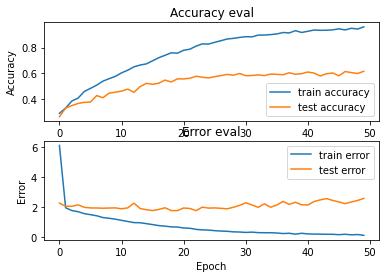

In [13]:
plot_history(history)

In [14]:
model_regularized = keras.Sequential([

    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(10, activation='softmax')
])

In [15]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
197/197 [==============================] - 1s 7ms/step - loss: 22.0044 - accuracy: 0.1853 - val_loss: 3.6561 - val_accuracy: 0.2223
Epoch 2/100
197/197 [==============================] - 1s 7ms/step - loss: 7.0021 - accuracy: 0.1804 - val_loss: 3.4144 - val_accuracy: 0.1660
Epoch 3/100
197/197 [==============================] - 1s 6ms/step - loss: 4.7614 - accuracy: 0.1729 - val_loss: 3.4492 - val_accuracy: 0.1589
Epoch 4/100
197/197 [==============================] - 1s 6ms/step - loss: 4.0688 - accuracy: 0.1723 - val_loss: 3.4631 - val_accuracy: 0.1423
Epoch 5/100
197/197 [==============================] - 1s 6ms/step - loss: 3.7957 - accuracy: 0.1677 - val_loss: 3.4569 - val_accuracy: 0.1412
Epoch 6/100
197/197 [==============================] - 1s 7ms/step - loss: 3.6752 - accuracy: 0.1607 - val_loss: 3.4388 - val_accuracy: 0.1482
Epoch 7/100
197/197 [==============================] - 1s 6ms/step - loss: 3.6192 - accuracy: 0.1660 - val_loss: 3.4178 - val_accuracy: 0.159

Epoch 58/100
197/197 [==============================] - 1s 6ms/step - loss: 2.0143 - accuracy: 0.4610 - val_loss: 2.0943 - val_accuracy: 0.4646
Epoch 59/100
197/197 [==============================] - 1s 6ms/step - loss: 1.9803 - accuracy: 0.4588 - val_loss: 2.0574 - val_accuracy: 0.4694
Epoch 60/100
197/197 [==============================] - 1s 6ms/step - loss: 1.9682 - accuracy: 0.4759 - val_loss: 2.0560 - val_accuracy: 0.4683
Epoch 61/100
197/197 [==============================] - 1s 6ms/step - loss: 1.9252 - accuracy: 0.4742 - val_loss: 2.0198 - val_accuracy: 0.4739
Epoch 62/100
197/197 [==============================] - 1s 6ms/step - loss: 1.9170 - accuracy: 0.4796 - val_loss: 2.0183 - val_accuracy: 0.4780
Epoch 63/100
197/197 [==============================] - 1s 6ms/step - loss: 1.8611 - accuracy: 0.5058 - val_loss: 1.9431 - val_accuracy: 0.5050
Epoch 64/100
197/197 [==============================] - 1s 6ms/step - loss: 1.8328 - accuracy: 0.5047 - val_loss: 1.9395 - val_accuracy:

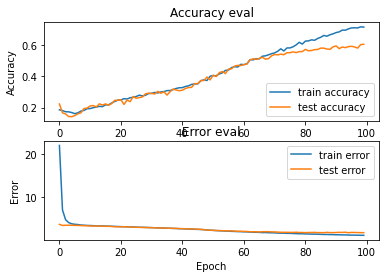

In [17]:
plot_history(history)

## CNN

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

X_train      = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test       = X_test[..., np.newaxis]

In [19]:
X_train.shape

(5397, 130, 13, 1)

In [20]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [21]:
model_cnn = keras.Sequential()

model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)        

In [24]:
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
169/169 [==============================] - 3s 20ms/step - loss: 2.2365 - accuracy: 0.2752 - val_loss: 1.8050 - val_accuracy: 0.3815
Epoch 2/50
169/169 [==============================] - 3s 19ms/step - loss: 1.7316 - accuracy: 0.4030 - val_loss: 1.5235 - val_accuracy: 0.4607
Epoch 3/50
169/169 [==============================] - 3s 19ms/step - loss: 1.5584 - accuracy: 0.4515 - val_loss: 1.3930 - val_accuracy: 0.4985
Epoch 4/50
169/169 [==============================] - 3s 20ms/step - loss: 1.4477 - accuracy: 0.4918 - val_loss: 1.3228 - val_accuracy: 0.5126
Epoch 5/50
169/169 [==============================] - 4s 21ms/step - loss: 1.3591 - accuracy: 0.5114 - val_loss: 1.2467 - val_accuracy: 0.5385
Epoch 6/50
169/169 [==============================] - 3s 21ms/step - loss: 1.2864 - accuracy: 0.5470 - val_loss: 1.2160 - val_accuracy: 0.5504
Epoch 7/50
169/169 [==============================] - 4s 21ms/step - loss: 1.2384 - accuracy: 0.5542 - val_loss: 1.1497 - val_accuracy: 0.5763

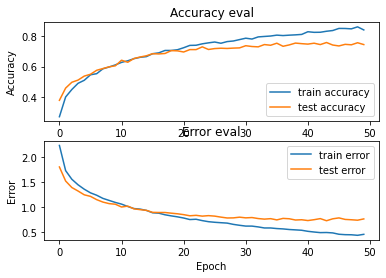

In [25]:
plot_history(history)

In [26]:
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=1)
print('\nTest accuracy:', test_acc)

71/71 [==============================] - 0s 4ms/step - loss: 0.7577 - accuracy: 0.7390

Test accuracy: 0.7389951348304749


In [27]:
model_cnn.save("Genre_Classifier.h5")

In [42]:
for n in range(10):
    i = random.randint(0,len(X_test))
    
    # pick a sample to predict from the test set
    X_to_predict = X_test[i]
    y_to_predict = y_test[i]
    print("\nReal Genre     :", y_to_predict)
    
    X_to_predict = X_to_predict[np.newaxis, ...]
    prediction   = model_cnn.predict(X_to_predict)
    
    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    print("Predicted Genre:", int(predicted_index))


Real Genre     : 7
Predicted Genre: 7

Real Genre     : 1
Predicted Genre: 1

Real Genre     : 8
Predicted Genre: 3

Real Genre     : 1
Predicted Genre: 1

Real Genre     : 6
Predicted Genre: 6

Real Genre     : 1
Predicted Genre: 1

Real Genre     : 0
Predicted Genre: 0

Real Genre     : 5
Predicted Genre: 5

Real Genre     : 1
Predicted Genre: 1

Real Genre     : 2
Predicted Genre: 2
